# Week 9 - Dimensionality Reduction and Feature Selection

## Learning Objectives

* Introduce the dimensionality reduction problem and different numeric methods available in scikit-learn
* General overview of the feature selection problem and tools bundled in scikit-learn


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection

%matplotlib inline

## Features and high-dimensional spaces

Dimensionality of a Machine Learning problem is defined by number of features (variables).

Machine Learning datasets could be interpreted as N points in M-dimensional space, where N is the number of samples and M is the number of features.

Many datasets contain a large number of features, sometimes much more than the number of samples.

Example 1: 20,000 genes as features and 1,000 patients as samples. 

Example 2: 30-dimensional benign-vs-malignant classification problem includes 30 features that describe characteristics of the cell nuclei present in images: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer.  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Whether this is individual pixels in images, transcripts or genes/proteins in -omics data or word occurrences in text data, a large number of features poses several challenges.

### Visualization difficulties

In particular, visualizing more than two dimensions is difficult, complicating data analysis and exploration.

### Risk of overfitting
Moreover, in machine learning models a large number of features translates into a large number of free parameters. With many parameters to fit, there is a risk of overfitting the models to the training data, and having a model that does not generalize to new observations. Overfitting leads to poor predictive performance of the models.

### Confounding factors
Some features may correlate and/or there could be hidden confounding factors behind them. Cross-correlations between features negatively affect numeric stability of the Machine Learning models and their performance. Additionally, some of the methods may imply independence of features.

### The curse of dimensionality

When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. 

### Well-posed vs ill-posed problems
1. a solution exists,
2. the solution is unique,
3. the solution's behavior changes continuously with the initial conditions.

### Solutions
An obvious solution to address these challenges would be reducing the number of features and, consequently, the dimensionality of the feature space. There are two approaches:

* Transform the data into a lower dimensional space (dimensionality reduction)
* Feature elimination (discard less important features) or feature selection (select more important features)
* Feature engineering -- using domain knowledge of the data to create features (expensive and difficult)

### Introductory video

Watch this video from Google AI introducting analysis of high-dimensional data:
https://aiexperiments.withgoogle.com/visualizing-high-dimensional-space

In [2]:
from IPython.display import HTML

HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/wvsE8jm1GzE?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


## Part 1. Dimensionality reduction

There are three fundamentally different ways of transforming the feature space:

* __Manifold Learning__ -- optimal for finding non-linear structure in a given dataset, however it may not be able to apply transformation to new data points. Typically it is an unsupervised machine learning problem - no predetermined labels or classification is required. Methods include: IsoMap, Locally Linear Embedding (LLE), Spectral Embedding, Multi-dimensional scaling (MDS), t-distributed Stochastic Neighbor Embedding (t-SNE), etc.

* __Decomposition__ -- a set of frameworks for finding optimal linear projections of data onto lower dimensional space without losing much information about the structure within the data. These linear frameworks include Principal Component Analysis (PCA), Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), Factor Analysis (FA), Dictionary Learning, Non-negative matrix factorization (NMF), etc.  

The main assumption is that the features in a lower-dimensional space (latent variables) represent the true structure of the data despite the large number of observed variables in the original data.


* See scikit example: http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

### 1.1 Example:  Multidimensional dataset

Dimensionality (100, 7)
Pairwise distances:


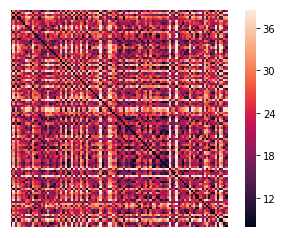

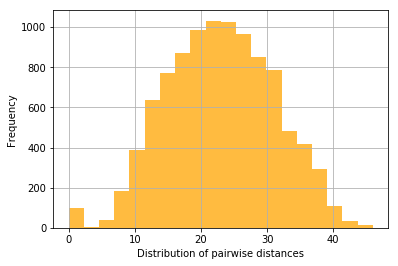

In [3]:
X, y = sklearn.datasets.make_blobs(n_samples=100, centers=4, n_features=7, random_state=0, cluster_std=4)
# X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)

print("Dimensionality", X.shape)

D = sklearn.metrics.pairwise_distances(X, metric='euclidean', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# The issue here is that include the 'label' column causes a linear matrix
# So, we specify all columns but the lable in the pairplot
df = pd.concat([pd.DataFrame(X), pd.DataFrame({'label': y})], axis=1)
df.head()
sns.pairplot(df, hue='label', vars=range(7))

In [5]:
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

### 1.2 Non-linear transformations with manifold learning

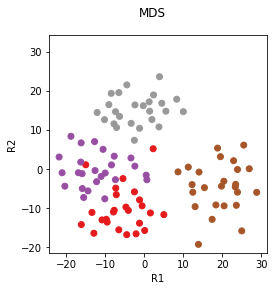

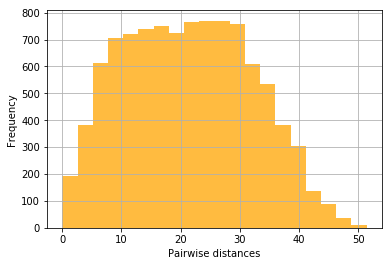

In [6]:
# examples of non-linear transformations:
from sklearn.manifold import MDS, Isomap, TSNE

# NOTE THAT THERE IS NO .transform(X)

R_MDS = MDS(n_components=2).fit_transform(X)
scatterplot_2D(R_MDS, 'MDS', y)


D = sklearn.metrics.pairwise_distances(R_MDS, metric='euclidean', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


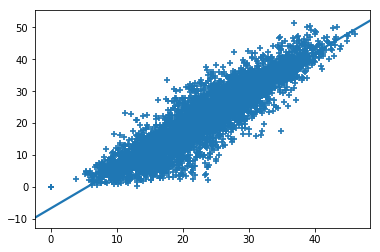

In [7]:
sns.regplot(
    x=sklearn.metrics.pairwise_distances(X, metric='euclidean', n_jobs=-1).flatten(),
    y=sklearn.metrics.pairwise_distances(R_MDS, metric='euclidean', n_jobs=-1).flatten(),
    marker="+",
    ci=68
)

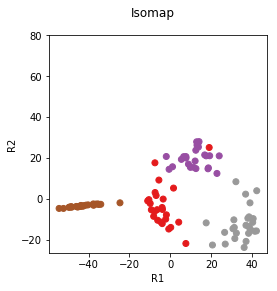

In [8]:
R_ISO = Isomap(n_components=2).fit_transform(X)
scatterplot_2D(R_ISO, 'Isomap', y)

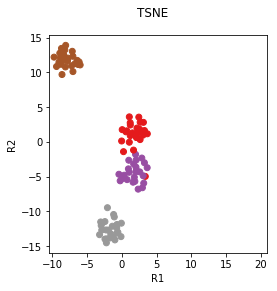

(100, 7)
(100, 2)


In [9]:
R_TSNE = TSNE(n_components=2, perplexity=20).fit_transform(X)
scatterplot_2D(R_TSNE, 'TSNE', y)
print(X.shape)
print(R_TSNE.shape)

### 1.3 Projection to 2D via decomposition

In the general form the decomposition methods take the original high-dimensional dataset and try to find a linear transformation into low-dimensional space.

Once the transformation is found for the original dataset it can be applied to other data, so there are both **.fit()** and **.transform()** methods.

Transformation matrix is available via **.components_**

### 1.3.1 Principal Component Analysis

[[-0.49600354 -0.54559848 -0.45687334  0.15129084  0.23539353  0.33600438
   0.23742698]
 [ 0.15437795 -0.50575483  0.17011189 -0.56207667  0.13146416 -0.46624548
   0.37529135]]
[44. 22.]


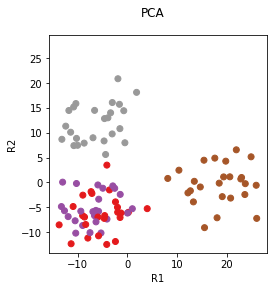

In [10]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(np.round(pca.explained_variance_ratio_ * 100))
R_PCA = pca.transform(X)
scatterplot_2D(R_PCA, 'PCA', y)

### 1.3.2 Factor Analysis

Factor Analysis is an implementation of Expectation Maximization algorithm (EM) with Gaussian latent variables.

[[-4.90052228 -3.92428816 -5.01228017  2.6788379   2.27661708  4.94843671
   1.52796216]
 [-0.41127478 -3.98623328 -1.18760274 -2.29635616  2.02981067 -2.34188746
   3.99921271]]


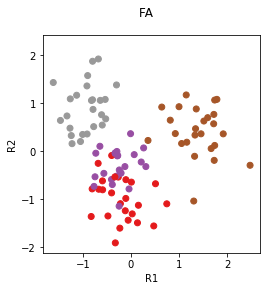

In [11]:
fa = sklearn.decomposition.FactorAnalysis(n_components=2)
fa.fit(X)
R_FA = fa.transform(X)
print(fa.components_)

scatterplot_2D(R_FA, 'FA', y)

### 1.3.3 Nonnegative matrix factorization (NMF)

NMF requires non-negative values in the dataset.

The benefit is that the non-negative coefficients in the transformation matrix is interpretable as weights. 

[[1.57137776 1.6894372  1.7924093  0.84051975 0.42761125 0.59522051
  0.7859738 ]
 [0.14300839 0.18220034 0.         1.01277491 1.07408604 1.07249494
  1.24310725]]


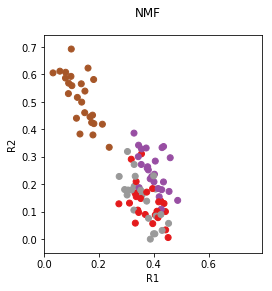

In [12]:
X_nonnegative = sklearn.preprocessing.MinMaxScaler().fit_transform(X)

nmf = sklearn.decomposition.NMF(n_components=2)

nmf.fit(X_nonnegative)
print(nmf.components_)

R_NMF = nmf.transform(X_nonnegative)

scatterplot_2D(R_NMF, 'NMF', y)

In [13]:
# Interpretation of a component as a combination of features with different contributions
np.round(nmf.components_[0] / np.sum(nmf.components_[0]) * 100)

array([20., 22., 23., 11.,  6.,  8., 10.])

###  1.4 Clustering in transformed feature space

### 1.4.1 Clustering in high-dimensional and visualization in low-dimensional space

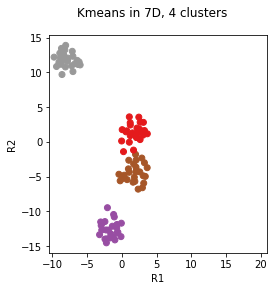

[1 2 0 2 2 0 0 1 3 1 2 3 3 2 1 3 1 3 0 1 1 0 3 2 1 2 0 0 2 3 2 0 2 3 0 2 3
 0 1 0 1 2 0 1 0 2 2 3 2 0 1 3 2 1 1 1 0 0 3 2 1 3 3 1 3 0 0 3 3 0 0 0 0 2
 1 0 2 3 1 0 1 1 2 3 1 3 3 0 2 3 2 3 1 1 2 3 2 2 1 3]
[2 3 0 3 3 0 0 2 1 2 3 1 1 3 2 1 2 1 2 2 2 0 1 3 2 3 0 0 3 1 3 0 3 1 0 3 1
 0 2 0 2 3 0 2 0 3 3 1 3 0 2 1 3 2 2 2 0 0 1 3 2 1 1 2 1 0 0 1 1 0 0 0 0 3
 2 0 3 1 2 0 2 2 3 1 2 1 1 0 3 1 3 1 2 2 3 1 3 3 2 1]
V measure 0.9695647763178208
Adj. Rand score 0.97305763367046


In [14]:
# Clustering the original 7D dataset with KMeans
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)

# visualization in 2D with the help of TSNE transformation
scatterplot_2D(R_TSNE, 'Kmeans in 7D, 4 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

### 1.4.2 Clustering and visualization in low-dimensional space

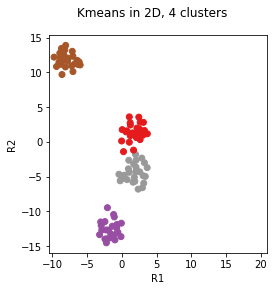

[1 2 0 2 2 0 0 1 3 1 2 3 3 2 1 3 1 3 0 1 1 0 3 2 1 2 0 0 2 3 2 0 2 3 0 2 3
 0 1 0 1 2 0 1 0 2 2 3 2 0 1 3 2 1 1 1 0 0 3 2 1 3 3 1 3 0 0 3 3 0 0 0 0 2
 1 0 2 3 1 0 1 1 2 3 1 3 3 0 2 3 2 3 1 1 2 3 2 2 1 3]
[3 2 0 2 2 0 0 3 1 3 2 1 1 2 3 1 3 1 3 3 3 0 1 2 3 2 0 0 2 1 2 0 2 1 0 2 1
 0 3 0 3 2 0 3 0 2 2 1 2 0 3 1 2 3 3 3 0 0 1 2 3 1 1 3 1 0 0 1 1 0 0 0 0 2
 3 0 2 1 3 0 3 3 2 1 3 1 1 0 2 1 2 1 3 3 2 1 2 2 3 1]
V measure 0.9695647763178208
Adj. Rand score 0.97305763367046


In [15]:
# Clustering of 2D dataset obtained by TSNE transformation
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(R_TSNE)

# visualization in 2D with the help of TSNE transformation
scatterplot_2D(R_TSNE, 'Kmeans in 2D, 4 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

###  1.5 Transforming pairwise dissimilarities between objects into feature space

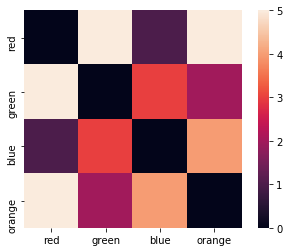

In [16]:
# Let's assume we have four objects called 'red', 'green', 'blue', 'orange'
# and that we only know the pairwise distances between objects
D = np.array(
    [[0, 5, 1, 5],
     [5, 0, 3, 2],
     [1, 3, 0, 4],
     [5, 2, 4, 0]])

sns.heatmap(D, robust=True, square=True,
            yticklabels=('red', 'green', 'blue', 'orange'),
            xticklabels=('red', 'green', 'blue', 'orange'), cbar=True)
plt.show()

Stress 0.3526608583730143


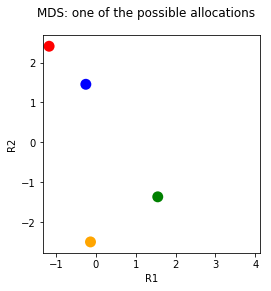

In [17]:
# Can we place these four objects in a 2-dimensional space, where their pairwise distances would roughly be preserved?
# MDS manifold learning from pairwise distances
M = sklearn.manifold.MDS(n_components=2, n_init=1, max_iter=10000, metric=True, dissimilarity="precomputed")
K = M.fit_transform(D)
print("Stress", M.stress_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(K[...,0], K[...,1], c=("red", "green", "blue", "orange"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("MDS: one of the possible allocations")
plt.show()

### 1.6. Example: NMF decomposition of gene expression in breast cancer

In [18]:
expression_fname = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz'

E = pd.read_csv(expression_fname, delimiter='\t')
E.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [19]:
donors = set(E['icgc_donor_id'])
genes = set(E['gene_name'])
antibodies = set(E['antibody_id'])

print("Donors (data points):", len(donors))
print("Genes (features?): ", len(genes))
print("Antibodies (features?): ", len(antibodies))

Donors (data points): 298
Genes (features?):  115
Antibodies (features?):  142


In [20]:
E = E[['icgc_donor_id', 'gene_name', 'antibody_id', 'normalized_expression_level']]
E.head()

,icgc_donor_id,gene_name,antibody_id,normalized_expression_level
0,DO4143,SERPINE1,PAI-1,1.769954
1,DO4143,ARID1A,ARID1A,0.619539
2,DO4143,FRAP1,mTOR_pS2448,-0.538637
3,DO4143,ASNS,ASNS,1.156044
4,DO4143,EGFR,EGFR,0.120138


In [21]:
E_mean = E.groupby(['icgc_donor_id','gene_name']).mean()
E_mean.head()

normalized_expression_level
icgc_donor_id gene_name                                  
DO1251        ACACA                              0.951190
              ACACA ACACB                        0.892499
              AKT1 AKT2 AKT3                    -0.049270
              AKT1S1                            -0.030702
              ANLN                              -0.199795

In [22]:
E_mean_wide = E_mean.unstack()
E_mean_wide.head()

normalized_expression_level                             \
gene_name                           ACACA ACACA ACACB AKT1 AKT2 AKT3   
icgc_donor_id                                                          
DO1251                           0.951190    0.892499      -0.049270   
DO1254                           1.376032    1.162665      -0.230698   
DO1258                          -0.402049   -0.322389      -0.200169   
DO1261                           1.361227    1.512532       0.422522   
DO1265                          -0.438206   -0.111050       0.112957   

                                                                           \
gene_name        AKT1S1      ANLN     ANXA1        AR      ARAF    ARID1A   
icgc_donor_id                                                               
DO1251        -0.030702 -0.199795 -0.905293  0.775228  0.094701  0.071743   
DO1254         0.137399 -0.114772 -0.215406  0.790482  0.134960 -0.030072   
DO1258        -0.064827 -0.081590  0.455625 -1.141689 -0.084109  0.114474   
DO1261         0.045455 -0.127973  0.290133  0.128472  0.216368 -0.440709   
DO1265        -0.068587 -0.041141 -0.614681  1.305268  0.145583  0.056447   

                           ...                                             \
gene_name          ASNS    ...         TGM2      TP53   TP53BP1      TSC2   
icgc_donor_id              ...                                              
DO1251        -0.470252    ...    -0.412749 -0.476795  0.010220  0.480902   
DO1254         0.231021    ...     0.286778 -0.502465  0.147657 -0.353349   
DO1258         0.871303    ...     0.047575  0.631423 -0.387374 -0.290853   
DO1261        -0.090565    ...    -0.289742 -0.131251 -0.230038 -0.052135   
DO1265         0.647928    ...    -0.016497 -0.222350  0.393662  0.139152   

                                                                           
gene_name          XBP1     XRCC1     XRCC5      YAP1      YBX1     YWHAE  
icgc_donor_id                                                              
DO1251         0.103099  0.025000 -0.386469 -0.604077  0.060155 -0.175260  
DO1254        -0.278673  0.298895 -0.224370 -0.532751 -0.164356  0.251877  
DO1258        -0.454089 -0.044778  0.222834  0.808895 -0.085985  0.007288  
DO1261        -0.132621 -0.060915  0.109820  0.642813 -0.026739 -0.214638  
DO1265        -0.096189 -0.130505  0.407023  0.009202  0.020125 -0.036943  

[5 rows x 115 columns]

In [23]:
# Scale data to non-negative values
X = sklearn.preprocessing.MinMaxScaler().fit_transform(E_mean_wide)

X ~ W dot H + error
X =  (298, 115)
W =  (10, 115)
H =  (298, 10)
Error =  19.46199399988898


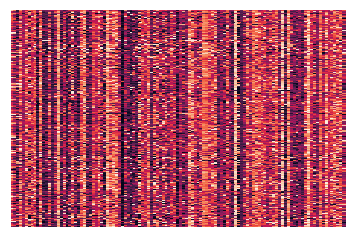

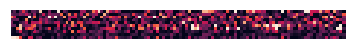

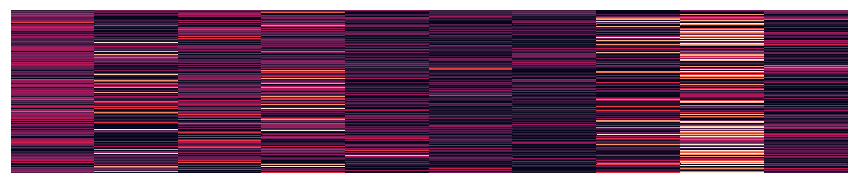

In [24]:
# NMF DECOMPOSITION

rank = 10
nmf = sklearn.decomposition.NMF(n_components=rank).fit(X)
W = nmf.components_
H = nmf.transform(X)
print("X ~ W dot H + error")
print("X = ", X.shape)
print("W = ", W.shape)
print("H = ", H.shape)
print("Error = ", nmf.reconstruction_err_)

sns.heatmap(X, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(6,6))
sns.heatmap(W,  robust=True, square=True, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(H, robust=True,  square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()

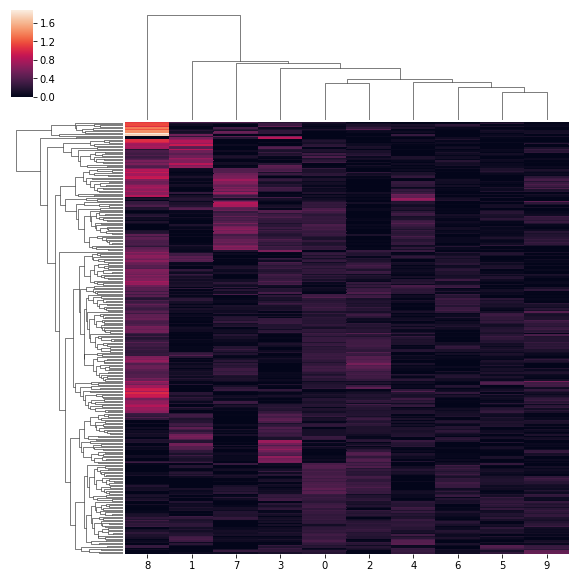

In [25]:
# Clustering in reduced feature space (10D)

sns.clustermap(H, xticklabels=True, yticklabels=False)
plt.show()

Features in the transformed space -- latent variables -- represent groups of genes with similar protein expression patterns in Breast Cancer. These could be, for instance, genes involved in the same pathway. 

Clustering also shows groups of donors with similar expression across the groups of genes. It could be helpful for defining subtypes of breast cancer based on expression.

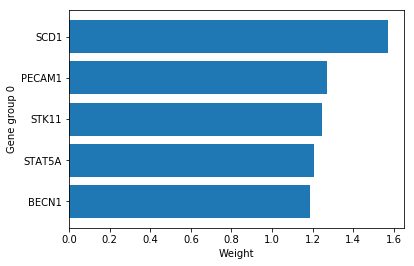

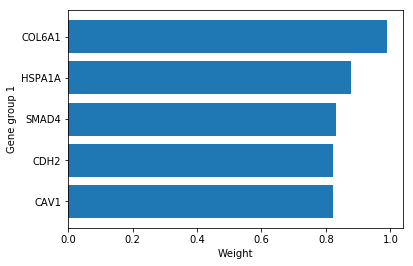

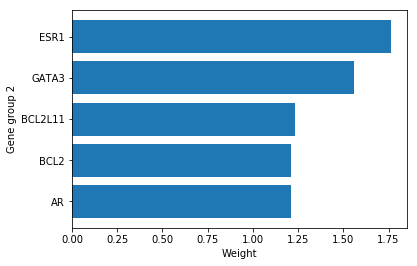

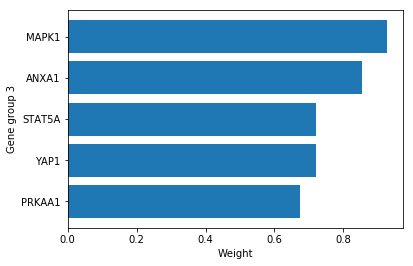

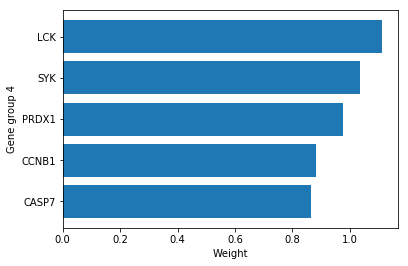

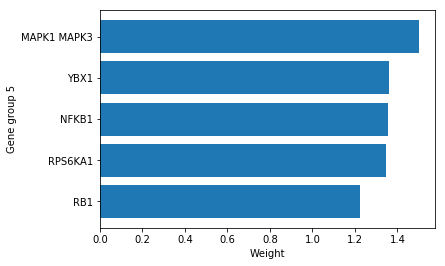

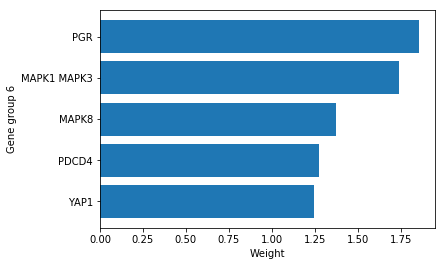

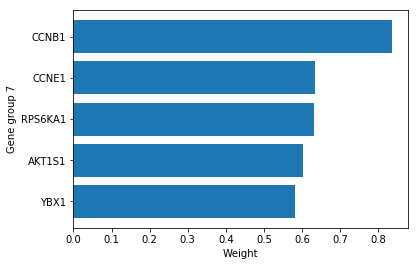

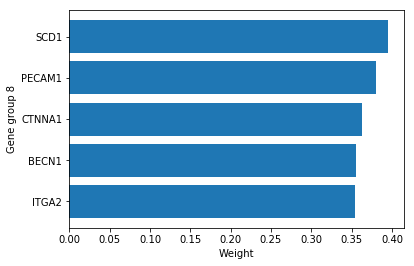

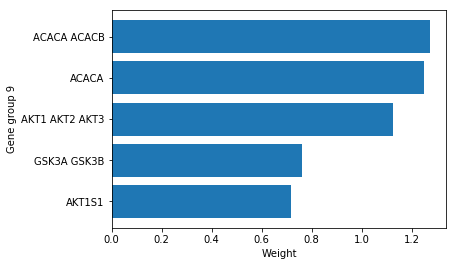

In [26]:
# Show top 5 genes in each gene group (NMF component)

# gene names in the data frame
id2gene = [_[1] for _ in E_mean_wide.columns.values]

for gene_group in range(H.shape[1]):
    k = 5
    # print(W[gene_group, :].shape)
    topk = np.argsort(np.asarray(W[gene_group, :]).flatten())[-k:]
    # print("Indices of related genes", topk)
    val = W[gene_group, topk]
    # print("Gene weights", val)
    plt.barh(np.arange(k) + .5, val, align="center")
    labels = [id2gene[idx] for idx in topk]
    plt.yticks(np.arange(k) + .5, labels)
    plt.xlabel("Weight")
    plt.ylabel("Gene group {}".format(gene_group));
    plt.show()

## 2. Feature Selection

[Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) can be used to choose the most informative features. This can improve the performance of subsequent models, reduce overfitting and have practical advantages when the model is ready to be utilized.

For instance, we should avoid features with confounding factors (not linearly independent) in linear models, such as linear regression.

There are a variety of approaches for feature selection:

* Remove uninformative features (same value for all, or nearly all, samples)
* Remove features that perform poorly at the task when used alone
* Iteratively remove the weakest features from a model until the desires number is reached


### 2.1 Variance threshold

Eliminates all features with variance across samples less than the threshold.

In [27]:
X = np.array([[1, 0, 0, 1],
              [1, 0, 1, 0],
              [1, 1, 0, 0],
              [1, 0, 1, 1],
              [1, 0, 1, 0],
              [1, 0, 1, 1]])

sel = sklearn.feature_selection.VarianceThreshold(threshold=0.2)
sel.fit(X)
print(sel.variances_)
X_selected = sel.transform(X)
print(X_selected)

[0.         0.13888889 0.22222222 0.25      ]
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


### 2.2 KBest features

Selects top $k$ features based on a criteria. For instance, chi-squared could be a criteria for selecting the features. Chi-squared requires labels.

In [28]:
print(sklearn.feature_selection.chi2.__doc__[:610])

Compute chi-squared stats between each non-negative feature and class.

    This score can be used to select the n_features features with the
    highest values for the test chi-squared statistic from X, which must
    contain only non-negative features such as booleans or frequencies
    (e.g., term counts in document classification), relative to the classes.

    Recall that the chi-square test measures dependence between stochastic
    variables, so using this function "weeds out" the features that are the
    most likely to be independent of class and therefore irrelevant for
    classification.

  


In [29]:
print(sklearn.datasets.load_iris.__doc__[:413])

iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape)

# select top 2 best features in terms of Chi-squared statistics
kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=2)
X_new = kbest.fit_transform(X, y)
print(X_new.shape)
print(kbest.scores_)

Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
(150, 4)
(150, 2)
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


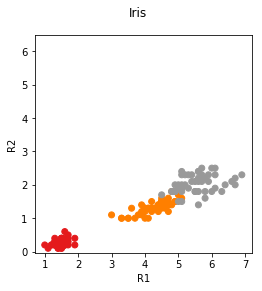

In [30]:
scatterplot_2D(X_new, 'Iris', y)

### 2.2 "Feature selection" translates to "model selection"

Iteratively removing or adding features means we change the number of the parameters for the machine learning model.

Essentially, it means that we will be comparing models built with different sets of features. However, adding more features can lead to a better fitting of the model and can cause overfitting. Therefore, the models have to be penalized for an excessive number of features (parameters).

“when you have two competing theories that make exactly the same predictions, the simpler one is the better.” - William of Ockham

So for a regression model LASSO (least absolute shrinkage and selection operator), or more commonly referred to as L1 regularization, could be used to penalize for the large number of parameters.

* L1 regularization (the last term of the equation) favors a sparse model with  features having coefficients equal to zero or close to zero:

$$(1 / (2 n_{samples})) * ||y - Xw||^2_2 + \alpha * ||w||_1$$

L1 norm $||w||_1$ is simply a sum of absolute values of coefficients and $\alpha$ regulates the strength of regularization. A zero coefficient for a feature essentially mean that the feature is eliminated.

In the breast cancer example that would mean that we favor a test with less antibodies required in the test panel.

### Example: features in digits images - which pixels are most important and which are least important?



In [31]:
# Load the digits dataset
digits = sklearn.datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

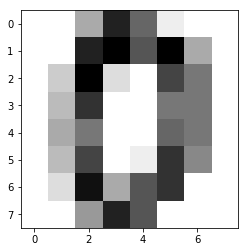

In [32]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

### RFE - Recursive feature elimination

RFE removes worst performing features one by one until the desired number of features is reached.

In the example below the criteria for feature selection is performance of Logistic Regression classifier with L1 regularization.

Features are ranked based on classification performance (typically, it is accuracy) and the heatmap below shows the ranks of each pixel (more important features have lower rank)

In [33]:
# Create the RFE (Recursive feature elimination) object and rank each pixel
# Use L1 regularization
clf = sklearn.linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-5, solver='liblinear', multi_class='auto')
rfe = sklearn.feature_selection.RFE(estimator=clf, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

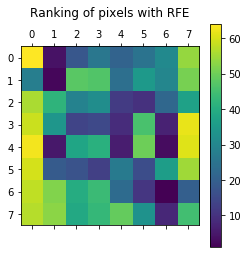

In [34]:
# Plot pixel ranking
plt.matshow(ranking) # cmap=plt.get_cmap('summer')
plt.colorbar()
plt.title("Ranking of pixels with RFE\n")
plt.show()

### Limitations:
The disadvantage with L1 regularization is that if multiple features are correlated only one of them will have a high coefficient.

Also important is to normalize the means and variances of the features before comparing the coefficients.

A limitation of linear models is that any interactions must be hand coded. A feature that is poorly predictive **overall** may actually be very powerful but only **in a limited subgroup** (e.g. in patients with a particular mutation). This might be missed in a linear model after feature elimination, whereas we would usually prefer to keep the feature.

### Extracting feature importances:

Any model exposing a `coef_` or `feature_importances_` attribute can be used with the `SelectFromModel` class for feature selection. 

[Random Forest](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) handles interactions well and unlike some of the other models does not require careful tuning of parameters to achieve reasonable performance.

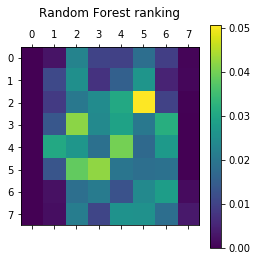

In [35]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
ranking = clf.feature_importances_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Random Forest ranking\n")
plt.show()

In [36]:
print("Dimensionality", X.shape[1])
print("Accuracy", sklearn.metrics.accuracy_score(y, clf.predict(X)))

# Make a classifier with half of the features based on their importances:
sfm = sklearn.feature_selection.SelectFromModel(clf, threshold="median")
sfm.fit(X, y)
X_low = sfm.transform(X)
print("\nDimensionality", X_low.shape[1])
clf2 = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
clf2.fit(X_low, y)
print("Accuracy", sklearn.metrics.accuracy_score(y, clf2.predict(X_low)))

Dimensionality 64
Accuracy 1.0

Dimensionality 32
Accuracy 1.0


### 2.3 Feature selection with cross-validation

Recursive feature elimination with cross-validation using accuracy of SVM classifier as criteria for feature selection. We then show for different number of features selected the cross validation score (accuracy).

Number of features corresponding to max CV score : 8


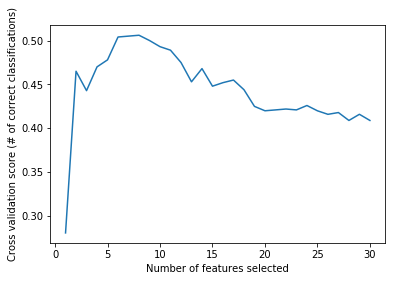

In [37]:
# Synthetic example:
# Build a classification task using 5 informative features
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=30, n_informative=5,
                           n_redundant=4, n_repeated=0, n_classes=4,
                           n_clusters_per_class=1, random_state=0,
                                           class_sep=0.2)

# Create the RFE object and compute a cross-validated score.
svc = sklearn.svm.SVC(kernel="linear", class_weight="balanced")
rfecv = sklearn.feature_selection.RFECV(estimator=svc,
                                        step=1,
                                        cv=sklearn.model_selection.StratifiedKFold(2),
                                        scoring='accuracy')
rfecv.fit(X, y)

print("Number of features corresponding to max CV score : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# print(rfecv.predict(X))


In [38]:
print(rfecv.ranking_[:rfecv.n_features_])

[17  1 19 23 18  7  3  1]
